#### Testing the effect of sampling rate on curvature 
Simulate some data, calculate curvature, then upsample 

In [2]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
from scipy.interpolate import PchipInterpolator

In [3]:
def curvature(X, Fs):
    """
    Compute average curvature of trajectory X (time × dims).
    """
    V = np.diff(X, axis=0)                      # displacement vectors
    norms = np.linalg.norm(V, axis=1)           # step lengths

    v_prev, v_next = V[:-1], V[1:]
    denom = norms[:-1] * norms[1:] + 1e-12
    cos = (v_prev * v_next).sum(axis=1) / denom
    cos = np.clip(cos, -1.0, 1.0)               
    angs = np.degrees(np.arccos(cos))                       # step-wise angles (in degrees)
    global_avg_ang = float(np.mean(angs)) 

    # normalize by time
    total_turn = angs.sum()
    total_duration_sec = (len(X)-1) / Fs
    ang_per_sec = total_turn / total_duration_sec
    
    # normalize by distance
    total_distance = norms.sum()
    ang_per_unit_distance = total_turn / total_distance 

    return global_avg_ang, ang_per_sec, ang_per_unit_distance
 

##### 1. Sine wave

Original per step global curvature (deg): 30.52359999577057
Upsampled per step global curvature (deg): 6.10417107905403
Original per second curvature (deg/s): 146.25891664640065
Upsampled per second curvature (deg/s): 151.37359732331566
Original per unit distance curvature (deg/unit distance): 65.39880788298223
Upsampled per unit distance curvature (deg/unit distance): 67.0283091758815


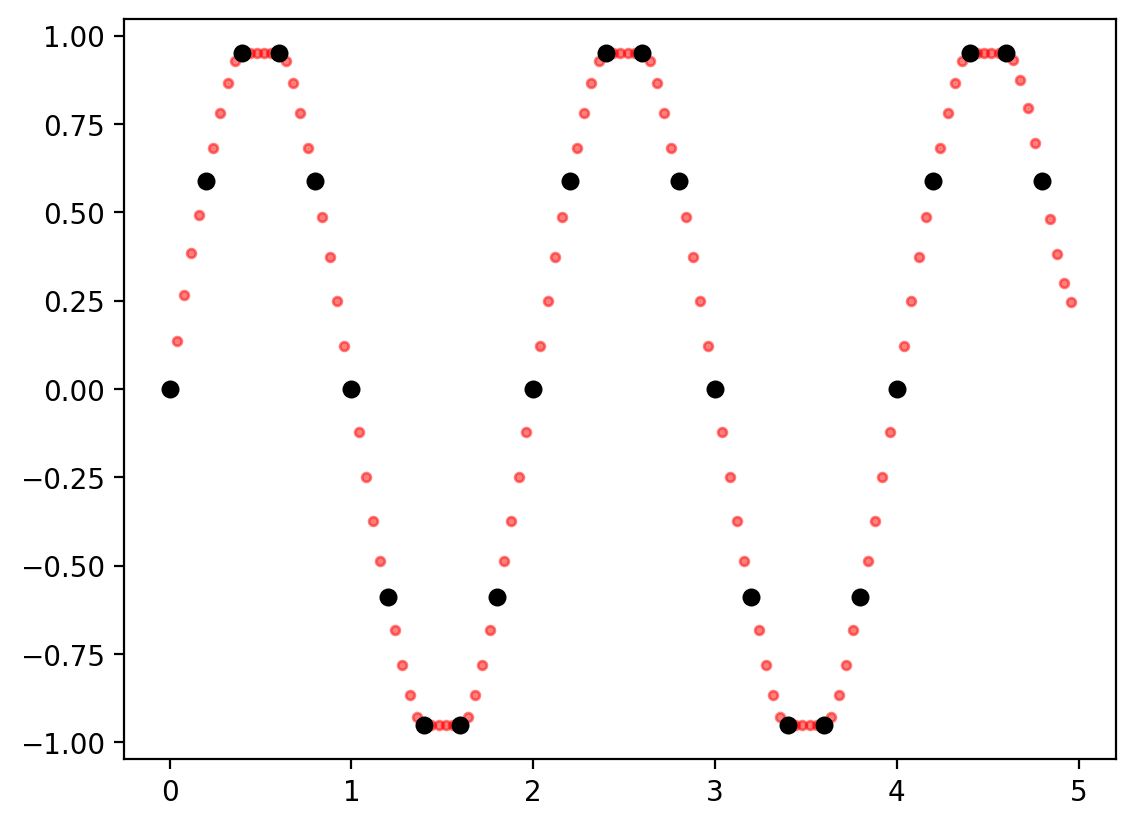

In [4]:
Fs = 5; T = 5; f = 0.5
t = np.linspace(0, T, int(Fs*T), endpoint=False)
x = t
y = np.sin(2*np.pi*f*t)

# upsample (interpolate using PCHIP (per coordinate))
up_factor = 5
x_fine = np.linspace(0, T, Fs*T*up_factor, endpoint=False)
interp_x = PchipInterpolator(x, x)(x_fine)
interp_y = PchipInterpolator(x, y)(x_fine)
plt.figure()
plt.scatter(interp_x, interp_y, s=10, c="red",alpha=0.5)
plt.scatter(x,y,s=30,c='black')

# calculate curvature before and after upsampling
curv_orig, curv_per_sec_orig, curv_per_dist_orig = curvature(np.column_stack([x, y]), Fs) 
curv_up, curv_per_sec_up, curv_per_dist_up = curvature(np.column_stack([interp_x, interp_y]), Fs*up_factor) 

print("Original per step global curvature (deg):", curv_orig)
print("Upsampled per step global curvature (deg):", curv_up)
print("Original per second curvature (deg/s):", curv_per_sec_orig)
print("Upsampled per second curvature (deg/s):", curv_per_sec_up)
print("Original per unit distance curvature (deg/unit distance):", curv_per_dist_orig)
print("Upsampled per unit distance curvature (deg/unit distance):", curv_per_dist_up)

